In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [7]:
data_path = "../imgs/imgs_sel/"

In [16]:
image_path_1 = data_path + "tartaruga1A.JPG"
image_path_2 = data_path + "tartaruga1B.JPG"
image_path_3 = data_path + "tartaruga2.JPG"

In [75]:
def treat_image(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    # img_gray = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    img_gray = cv2.Canny(img_gray, 50, 130, 3, L2gradient = False)
    return img_gray

Match entre 1 e 2: 0.15467315249535063
Match entre 1 e 3: 0.05842809680519934
Match entre 2 e 3: 0.01638599954344011


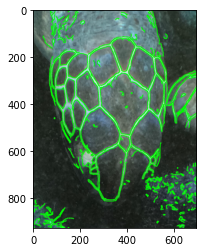

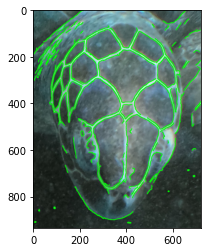

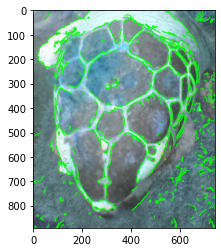

In [76]:
img1 = cv2.imread(image_path_1)
img_gray1 = treat_image(img1)

img2 = cv2.imread(image_path_2)
img_gray2 = treat_image(img2)

img3 = cv2.imread(image_path_3)
img_gray3 = treat_image(img3)


contours1, hierarchy1 = cv2.findContours(img_gray1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours2, hierarchy2 = cv2.findContours(img_gray2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours3, hierarchy3 = cv2.findContours(img_gray3, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)


d2=cv2.matchShapes(img_gray1, img_gray2, cv2.CONTOURS_MATCH_I2, 0)
print("Match entre 1 e 2:", d2)

d3=cv2.matchShapes(img_gray1, img_gray3, cv2.CONTOURS_MATCH_I2, 0)
print("Match entre 1 e 3:", d3)

d4=cv2.matchShapes(img_gray2, img_gray3, cv2.CONTOURS_MATCH_I2, 0)
print("Match entre 2 e 3:", d4)


cv2.drawContours(img1, contours1, -1, (0, 255, 0), 2)
plt.imshow(img1)
plt.show()

cv2.drawContours(img2, contours2, -1, (0, 255, 0), 2)
plt.imshow(img2)
plt.show()

cv2.drawContours(img3, contours3, -1, (0, 255, 0), 2)
plt.imshow(img3)
plt.show()